<h1>Machine Learning Project</h1>
<h3>Project Name: Store Performance Classification</h3>

# Step 0 - Import Libraries
using all the module that are import 


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1 - Import the Data Set

### Loading the dataset from file

#### In this step, the dataset from a csv (comma-seperated-values) is imported into a pandas dataframe

In [2]:
dataset_path = "storedata.csv"

In [3]:
dataset = pd.read_csv(dataset_path, index_col = None)


# Step 2 - Data Exploration

#### Visualizing first 10 rows of the dataset
#### In this step, the dataset is displayed to see the columns and data inside them.
#### Data cleaning will be propocessed at the end of this step as all the columns would have been explored

In [4]:
dataset.head(15)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
5,Southwell,UK,2309,Sarah,7,17888,119,Yes,19,Retail Park,1614716,1325848,1220059,1193318,2,394,17,11,Good
6,Swinton (South Yorkshire),UK,3800,James,8,13814,109,Yes,17,High Street,1323396,1047485,1000888,1000844,5,228,11,14,Bad
7,Sowerby Bridge,UK,4214,Ashley,9,15643,114,Y,11,Retail Park,1052606,1025407,1004490,1000319,4,258,12,16,Good
8,Sheffield,UK,4857,Guilherme,9,13869,109,Yes,12,Shopping Centre,1537032,1301956,1220364,1057921,9,217,19,14,Good
9,Stanley,UK,4860,Grace,7,12071,105,Yes,19,High Street,1141000,1029186,1005096,1000687,6,222,16,18,Good


### Name of all columns in the dataset

In [5]:
list(dataset.columns)

['Town',
 'Country',
 'Store ID',
 'Manager name',
 'Staff',
 'Floor Space',
 'Window',
 'Car park',
 'Demographic score',
 'Location',
 '40min population',
 '30 min population',
 '20 min population',
 '10 min population',
 'Store age',
 'Clearance space',
 'Competition number',
 'Competition score',
 'Performance']

### Statistical Calculation of numerical columns


In [6]:
dataset.describe()

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
count,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,136.000000,136.000000,136.000000,136.000000
mean,52172.580882,13.352941,15024.095588,112.044118,14.463235,1.487374e+06,1.249870e+06,1.134533e+06,1.066118e+06,6.529412,262.426471,14.463235,14.808824
std,28725.990237,56.592439,2761.801921,6.884085,2.874944,2.804989e+05,2.160875e+05,1.490280e+05,8.884585e+04,2.815147,51.724288,2.895483,2.955258
min,1437.000000,-2.000000,10072.000000,100.000000,10.000000,1.030405e+06,1.000653e+06,1.000214e+06,1.000002e+06,2.000000,200.000000,10.000000,10.000000
25%,24707.250000,6.000000,12793.000000,106.750000,12.000000,1.254949e+06,1.057284e+06,1.012573e+06,1.005593e+06,4.000000,220.750000,12.000000,13.000000
50%,56011.500000,7.000000,14596.500000,111.000000,14.500000,1.516338e+06,1.214459e+06,1.077542e+06,1.033228e+06,6.000000,249.000000,15.000000,15.000000
75%,76870.500000,8.000000,17543.750000,118.000000,17.000000,1.696352e+06,1.396967e+06,1.203077e+06,1.090349e+06,9.000000,292.250000,17.000000,18.000000
max,99854.000000,600.000000,19869.000000,124.000000,19.000000,1.997044e+06,1.929089e+06,1.723395e+06,1.426533e+06,11.000000,408.000000,19.000000,19.000000


## Exploratory data analysis

### Total number of rows and columns in dataset

In [7]:
print('Number of rows in dataset',dataset.shape[0])
print('Number of columns in dataset',dataset.shape[1])

Number of rows in dataset 136
Number of columns in dataset 19


### Number of unique values of " Stores " from the dataset


In [8]:
dataset["Store ID"].unique().shape

(136,)

### Number of unique values of " Town " from the dataset


In [9]:
dataset["Town"].unique().shape

(136,)

### Number of unique values of " Manager name " from the dataset ???

In [10]:
dataset["Manager name"].unique().shape

(118,)

### All unique values in the " Location " column and count of their values

In [11]:
print('Unique values from location column are', dataset["Location"].unique())
dataset["Location"].value_counts()

Unique values from location column are ['Retail Park' 'Shopping Centre' 'High Street' 'Village']


Shopping Centre    52
Retail Park        43
High Street        40
Village             1
Name: Location, dtype: int64

### All unique values in the " Car park " column and count of their values

In [12]:
print('Unique values from Car park column are', dataset["Car park"].unique())
dataset["Car park"].value_counts()

Unique values from Car park column are ['Yes' 'No' 'Y' 'N']


Yes    94
No     35
Y       4
N       3
Name: Car park, dtype: int64

### All unique values in the " Country " column and count of their values

In [13]:
print('Unique values from Country column are', dataset["Country"].unique())
dataset["Country"].value_counts()

Unique values from Country column are ['UK' 'France']


UK        134
France      2
Name: Country, dtype: int64

### All unique values in the " Performance " column and count of their values

In [14]:
print('Unique values from Performance column are', dataset["Performance"].unique())
dataset["Performance"].value_counts()

Unique values from Performance column are ['Good' 'Bad']


Good    69
Bad     67
Name: Performance, dtype: int64

### All unique values in the " Staff " column and count of their values

In [15]:
print('Unique values from Staff column are', dataset["Staff"].unique())
dataset["Staff"].value_counts()

Unique values from Staff column are [  9   8  -2   7   5   6 300 600]


 7      29
 5      29
 6      29
 9      28
 8      18
-2       1
 300     1
 600     1
Name: Staff, dtype: int64

### Extracting minimum and maximum age of Store 

In [16]:
print('Minimum age of Store in this dataset is', min(dataset["Store age"]))

Minimum age of Store in this dataset is 2


In [17]:
print('Maximum age of Store in this dataset is', max(dataset["Store age"]))

Maximum age of Store in this dataset is 11


### Checking all the columns with NANs

In [18]:
for column in dataset.columns:
    if (dataset[column].isnull().values.any()):
        print(f"'{column}' columns contains NAN as value. These rows should be updated in data cleaning.")
    

the dataset doesn't contain NAN values

## Step 3 - Data Insights Discovered so far

<p>Data insights</p>
<ul>
    <li>The dataset contains 136 rows</li>
    <li>There are 2 different values for Car park:
        <ul>
            <li>Y/Yes</li>
            <li>N/No</li>
        </ul>
    </li>
    <li>There are 4 different values for Location:
        <ul>
            <li>Retail Park</li>
            <li>Shopping Centre</li>
            <li>High Street</li>
            <li>Village</li>
        </ul>
    </li>
    <li>There are 2 different values for Country:
        <ul>
            <li>France</li>
            <li>UK</li>
        </ul>
    </li>
    <li>There are 2 different values for Performance:
        <ul>
            <li>Bad</li>
            <li>Good</li>
        </ul>
    </li>
    <li>Store ages are between minimum 2 and maximum 11</li>
</ul>
<p>The following columns are updated after feature engineering and cleaning:</p>
<ul>
    <li>Town: removing this column because it contains all unique values</li>
    <li>Store ID: removing this column because it contains most of the  unique values</li>
    <li>Manager name: removing this column because it contains all unique values and will affect model performance</li>
    <li>Country: Doesn’t contain NAN value and string value should be replaced by integer value</li>
    <li>Staff: Doesn’t contain NAN value but contain outlier which are removed because they will affect model performance</li>
    <li>Floor Space: Doesn’t contain NAN value</li>
    <li>Window: Doesn’t contain NAN value</li>
    <li>Car park: Doesn’t contain NAN value and string value should be replaced by integer value</li>
    <li>Demographic score: Doesn’t contain NAN value</li>
    <li>Location: Doesn’t contain NAN value and string value should be replaced by integer value</li>
    <li>40min population: Doesn’t contain NAN value</li>
    <li>30 min population: Doesn’t contain NAN value</li>
    <li>20 min population: Doesn’t contain NAN value</li>
    <li>10 min population: Doesn’t contain NAN value</li>
    <li>Store age: Doesn’t contain NAN value</li>
    <li>Clearance space: Doesn’t contain NAN value</li>
    <li>Competition number: Doesn’t contain NAN value</li>
    <li>Competition score: Doesn’t contain NAN value</li>
    <li>Performance: Doesn’t contain NAN value and string value should be replaced by integer value</li>
</ul>

## Step 4 - Data Cleaning & Feature Engineering
In this step all the recommendations from previous step are implemented

### Total Columns in dataset

In [19]:
list(dataset.columns)

['Town',
 'Country',
 'Store ID',
 'Manager name',
 'Staff',
 'Floor Space',
 'Window',
 'Car park',
 'Demographic score',
 'Location',
 '40min population',
 '30 min population',
 '20 min population',
 '10 min population',
 'Store age',
 'Clearance space',
 'Competition number',
 'Competition score',
 'Performance']

### Check numeric and non-numeric columns

In [20]:
# Check which columns are numeric
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols)

# Check which columns are non-numeric
non_numeric_cols = dataset.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Numeric columns: ['Store ID', 'Staff', 'Floor Space', 'Window', 'Demographic score', '40min population', '30 min population', '20 min population', '10 min population', 'Store age', 'Clearance space', 'Competition number', 'Competition score']
Non-numeric columns: ['Town', 'Country', 'Manager name', 'Car park', 'Location', 'Performance']


### Removing " Town " , " Manager name ", and " Store ID " columns as they have all unique values and will leads to bad model performance

In [21]:
dataset = dataset.drop(["Town", "Store ID", "Manager name"], axis=1)
dataset.head()

,Country,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,UK,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,UK,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,UK,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,UK,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,UK,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


### Replacing String valued columns(Car park, Country, Location, Performance) with integar values

In [22]:
dataset['Car park'] = dataset['Car park'].replace({'Yes': 1, 'No': 0, 'Y':1, 'N':0})
dataset['Country'] = dataset['Country'].replace({'UK': 0, 'France':1})
dataset['Location'] = dataset['Location'].replace({'Village': 0, 'High Street':1,'Retail Park':2,'Shopping Centre':3})
dataset['Performance'] = dataset['Performance'].replace({'Good': 1, 'Bad':0})
dataset.head()

,Country,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,0,9,18526,121,1,10,2,1288374,1138224,1006986,1002340,3,238,16,16,1
1,0,8,18569,121,1,11,3,1086225,1015321,1012182,1008436,4,384,15,19,1
2,0,-2,12288,105,0,12,2,1595638,1281661,1104490,1011395,11,219,13,18,0
3,0,7,17092,117,0,14,1,1179395,1022959,1009496,1002169,5,261,15,12,0
4,0,7,11307,103,0,18,2,1398558,1085170,1003137,1002513,7,200,19,13,0


### Cleaning Staff column data

#### Detecting outliers through box plot

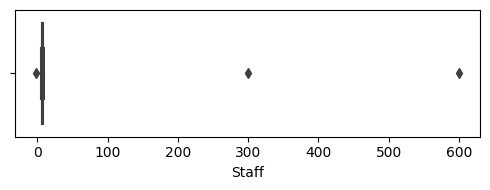

In [23]:
plt.figure(figsize=(5,2))
sns.boxplot(x =dataset["Staff"])
plt.tight_layout()
plt.show()

we can see the three outliers -2, 300, and 600 are easily visible through box plot

## For clear view displaying Staff column with histogram and frequency distribution graph

### Staff data before cleaning

<AxesSubplot: >

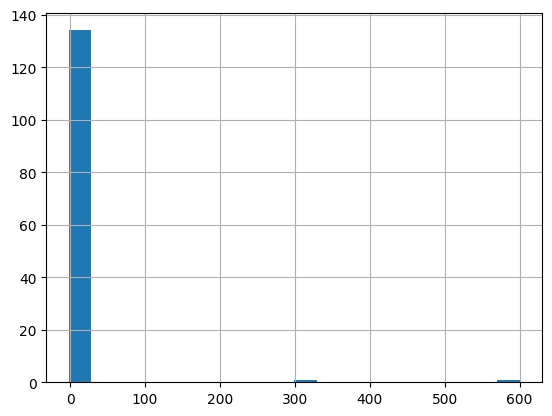

In [24]:
dataset["Staff"].hist(bins=20)

### Saving image of histogram

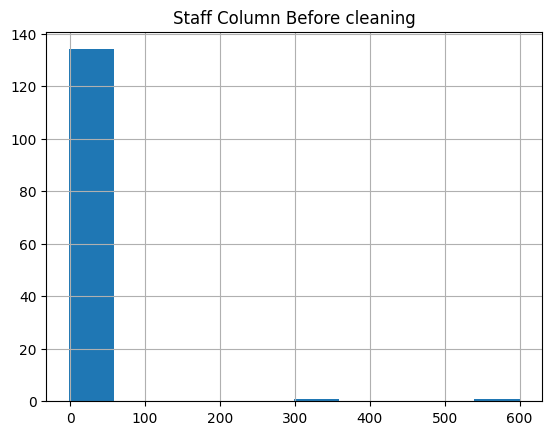

In [25]:
dataset["Staff"]
fig, ax = plt.subplots()
dataset.hist('Staff', ax=ax, )
plt.title('Staff Column Before cleaning')
fig.savefig('1.png')

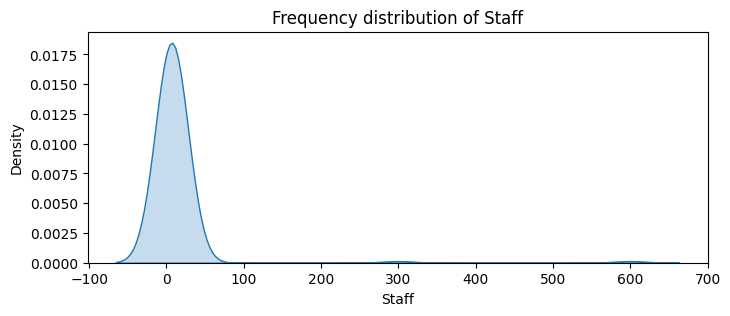

In [26]:
plt.figure(figsize=(8, 3))

plt.title("Frequency distribution of Staff")
sns.kdeplot(dataset['Staff'], shade=True)

plt.show()

### Removing row containing these outliers (-2, 300, 600)

In [27]:
dataset.drop(dataset.index[dataset['Staff'].isin([-2, 300, 600])], inplace=True)


### Staff data after cleaning

<AxesSubplot: >

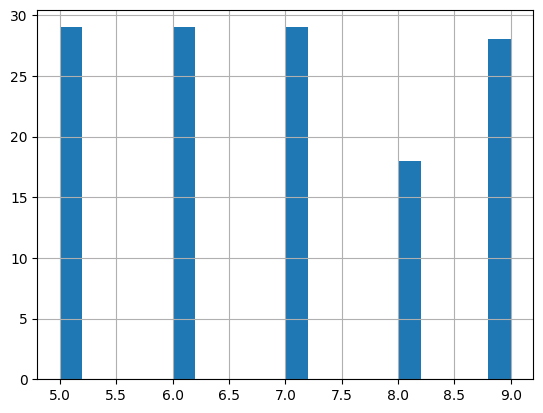

In [28]:
dataset["Staff"].hist(bins=20)

### Saving image of histogram

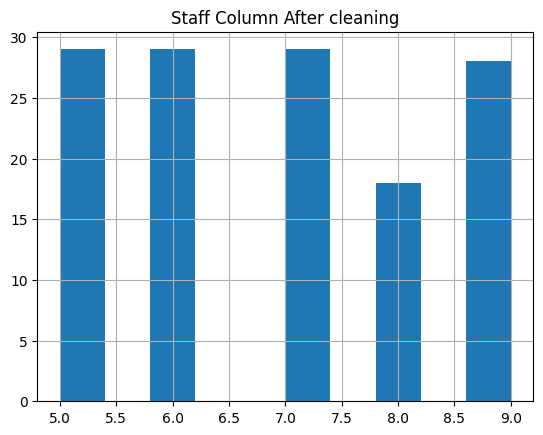

In [29]:
dataset["Staff"]
fig, ax = plt.subplots()
dataset.hist('Staff', ax=ax)
plt.title("Staff Column After cleaning")
fig.savefig('2.png')

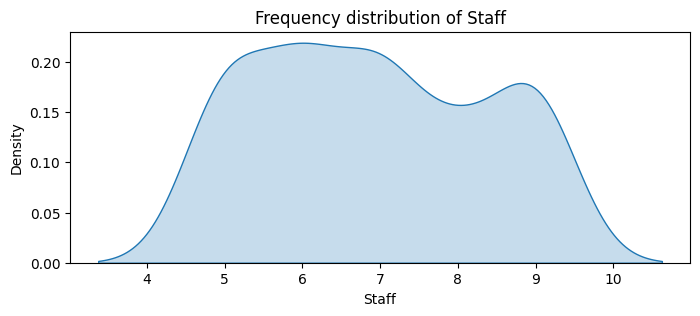

In [30]:
plt.figure(figsize=(8, 3))

plt.title("Frequency distribution of Staff")
sns.kdeplot(dataset['Staff'], shade=True)

plt.show()

### Plotting some other column for better exploration of dataset


In [31]:
color_pallete =["#a67c00",
                "#bf9b30",
                "#ffbf00",
                "#ffcf40",
                "#ffdc73",
                "#3ea958",
                "#57b46d",
                "#6fbe82",
                "#87c997"]
sns.set_style('whitegrid')
sns.set_palette(color_pallete)

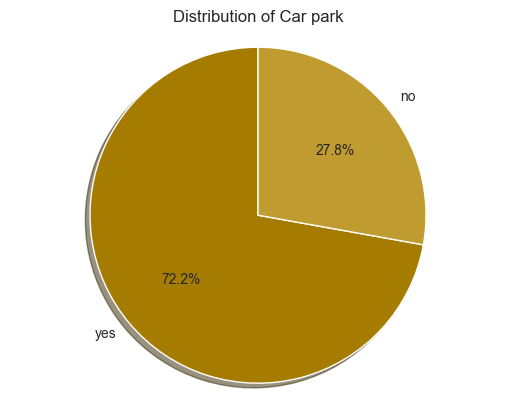

In [32]:
labels = ['yes', 'no']
sizes  = dataset["Car park"].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.xticks([])
plt.yticks([])

plt.title("Distribution of Car park")

plt.show()

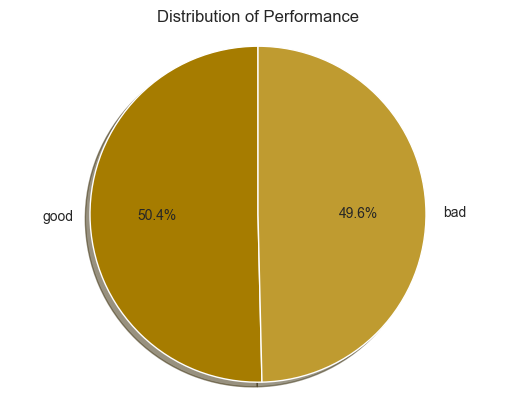

In [33]:
labels = ['good', 'bad']
sizes  = dataset["Performance"].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.xticks([])
plt.yticks([])

plt.title("Distribution of Performance")

plt.show()

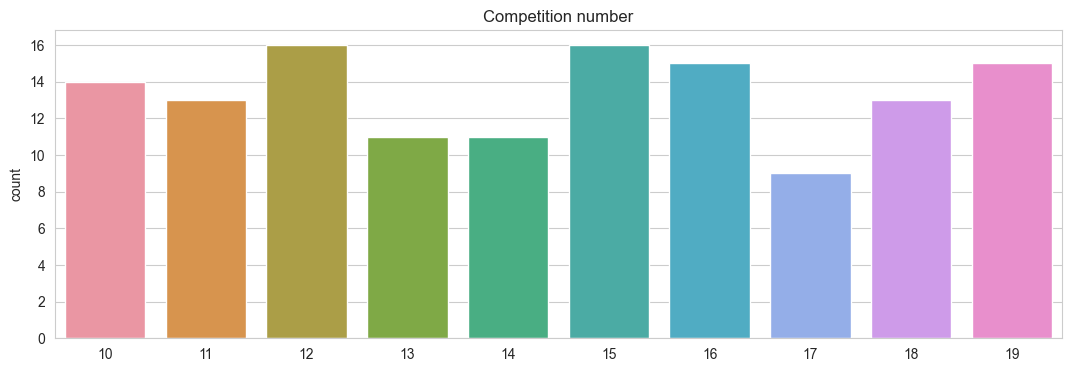

In [34]:
plt.figure(figsize=(13, 4))

plt.title("Competition number")
sns.countplot(x = sorted(dataset['Competition number']))

plt.show()

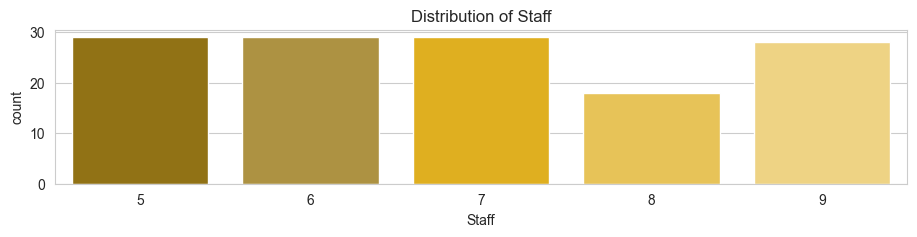

In [35]:
plt.figure(figsize=(11, 2))

plt.title("Distribution of Staff")
sns.countplot(x = dataset['Staff'].astype(int))

plt.show()

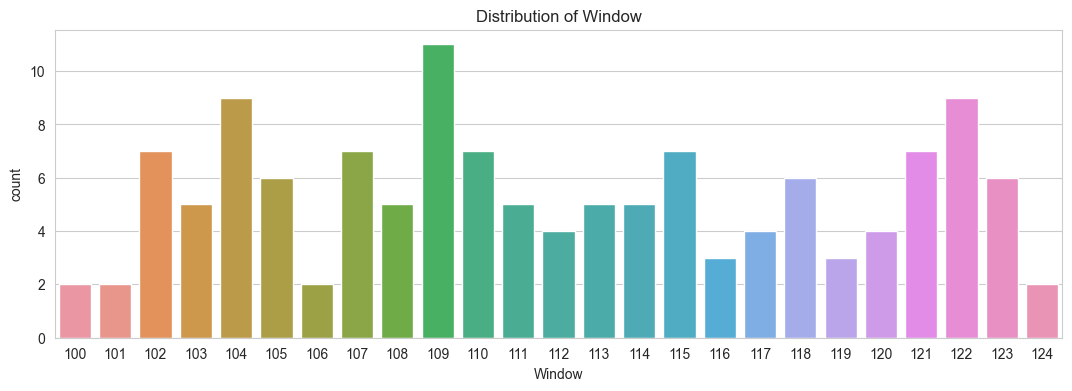

In [36]:
plt.figure(figsize=(13, 4))

plt.title("Distribution of Window")
sns.countplot(x = dataset['Window'].astype(int))

plt.show()

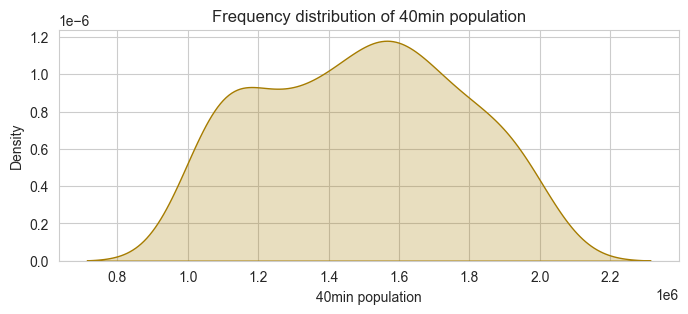

In [37]:
plt.figure(figsize=(8, 3))

plt.title("Frequency distribution of 40min population")
sns.kdeplot(dataset['40min population'], shade=True)

plt.show()

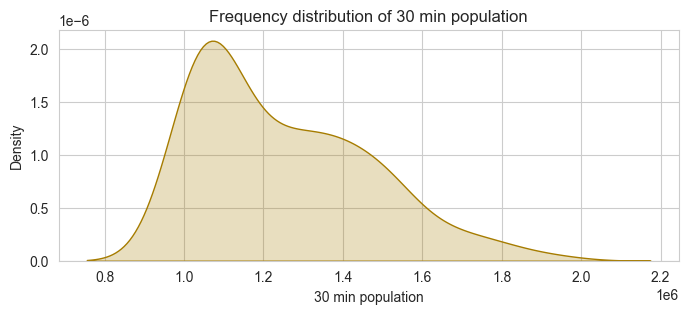

In [38]:
plt.figure(figsize=(8, 3))

plt.title("Frequency distribution of 30 min population")
sns.kdeplot(dataset['30 min population'], shade=True)

plt.show()

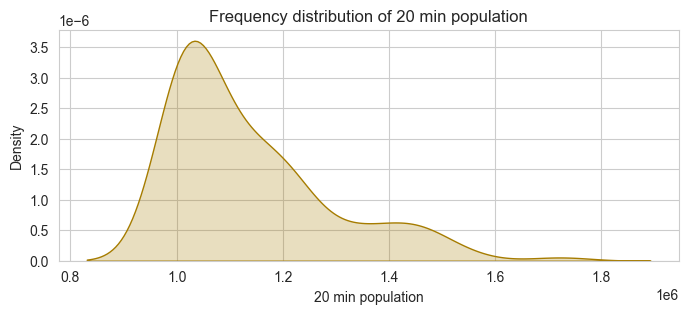

In [39]:
plt.figure(figsize=(8, 3))

plt.title("Frequency distribution of 20 min population")
sns.kdeplot(dataset['20 min population'], shade=True)

plt.show()

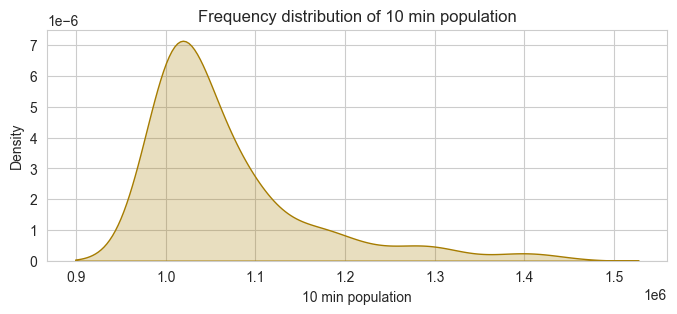

In [40]:
plt.figure(figsize=(8, 3))

plt.title("Frequency distribution of 10 min population")
sns.kdeplot(dataset['10 min population'], shade=True)

plt.show()

## Step 5 - Data Preparation

<b>
In this step, raw dataset is processed to make it model friendly.

Lastly the dataset is split in train and test sets with a ratio of 85 to 15 using a random seed (shuffle) of 42.

</b>

### Columns before preperation

In [41]:
dataset.columns

Index(['Country', 'Staff', 'Floor Space', 'Window', 'Car park',
       'Demographic score', 'Location', '40min population',
       '30 min population', '20 min population', '10 min population',
       'Store age', 'Clearance space', 'Competition number',
       'Competition score', 'Performance'],
      dtype='object')

In [42]:
dataset.head()

,Country,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,0,9,18526,121,1,10,2,1288374,1138224,1006986,1002340,3,238,16,16,1
1,0,8,18569,121,1,11,3,1086225,1015321,1012182,1008436,4,384,15,19,1
3,0,7,17092,117,0,14,1,1179395,1022959,1009496,1002169,5,261,15,12,0
4,0,7,11307,103,0,18,2,1398558,1085170,1003137,1002513,7,200,19,13,0
5,0,7,17888,119,1,19,2,1614716,1325848,1220059,1193318,2,394,17,11,1


### Using PCA to detect import columns from dataset

In [43]:
import pandas as pd
from sklearn.decomposition import PCA

df_numeric = dataset.copy()
# Normalize the data for PCA
df_normalized = (df_numeric - df_numeric.mean()) / df_numeric.std()

# Perform PCA to extract important components
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(df_normalized)

# Get the names of the most important columns
important_cols = pd.DataFrame(pca.components_.T, columns=[f'component_{i}' for i in range(n_components)])
important_cols = important_cols.abs().sum(axis=1).sort_values(ascending=False).index.tolist()
important_cols = df_numeric.columns[important_cols]

### Dataframe after cleaning and feature engineering

In [44]:
dataset[important_cols]

,Demographic score,Competition score,Competition number,Store age,Country,Car park,Staff,Location,Performance,Floor Space,40min population,Window,10 min population,20 min population,Clearance space,30 min population
0,10,16,16,3,0,1,9,2,1,18526,1288374,121,1002340,1006986,238,1138224
1,11,19,15,4,0,1,8,3,1,18569,1086225,121,1008436,1012182,384,1015321
3,14,12,15,5,0,0,7,1,0,17092,1179395,117,1002169,1009496,261,1022959
4,18,13,19,7,0,0,7,2,0,11307,1398558,103,1002513,1003137,200,1085170
5,19,11,17,2,0,1,7,2,1,17888,1614716,119,1193318,1220059,394,1325848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,13,14,18,6,0,1,7,2,0,14120,1665074,110,1041041,1141898,202,1240813
132,15,18,13,5,0,0,6,3,0,11205,1657769,103,1160929,1378708,203,1424404
133,19,18,18,7,0,0,7,3,0,16190,1407456,115,1063718,1200486,341,1359511
134,17,10,14,11,0,0,6,1,0,15516,1451087,113,1045154,1127276,261,1245725


### Important columns after cleaning and feature engineering

In [45]:
list(dataset[important_cols].columns)

['Demographic score',
 'Competition score',
 'Competition number',
 'Store age',
 'Country',
 'Car park',
 'Staff',
 'Location',
 'Performance',
 'Floor Space',
 '40min population',
 'Window',
 '10 min population',
 '20 min population',
 'Clearance space',
 '30 min population']

In [46]:
['Demographic score',
 'Competition score',
 'Competition number',
 'Store age',
 'Country',
 'Car park',
 'Staff',
 'Location',
 'Performance',
 'Floor Space',
 '40min population',
 'Window',
 '10 min population',
 '20 min population',
 'Clearance space',
 '30 min population']

['Demographic score',
 'Competition score',
 'Competition number',
 'Store age',
 'Country',
 'Car park',
 'Staff',
 'Location',
 'Performance',
 'Floor Space',
 '40min population',
 'Window',
 '10 min population',
 '20 min population',
 'Clearance space',
 '30 min population']

### Seperating data and label column after cleaning and feature engineering

In [47]:
# Select the important columns from the original DataFrame
X = dataset[important_cols]
X = X.drop(['Performance'], axis=1)

# Set the target variable
y = dataset['Performance']

### Normalizing dataset for training 

In [48]:
X = (X - X.min()) / (X.max() - X.min())

In [49]:
X.head()

,Demographic score,Competition score,Competition number,Store age,Country,Car park,Staff,Location,Floor Space,40min population,Window,10 min population,20 min population,Clearance space,30 min population
0,0.000000,0.666667,0.666667,0.111111,0.0,1.0,1.00,0.666667,0.862917,0.266872,0.875000,0.005481,0.009364,0.182692,0.148175
1,0.111111,1.000000,0.555556,0.222222,0.0,1.0,0.75,1.000000,0.867306,0.057746,0.875000,0.019773,0.016549,0.884615,0.015799
3,0.444444,0.222222,0.555556,0.333333,0.0,0.0,0.50,0.333333,0.716546,0.154132,0.708333,0.005081,0.012835,0.293269,0.024025
4,0.888889,0.333333,1.000000,0.555556,0.0,0.0,0.50,0.666667,0.126059,0.380859,0.125000,0.005887,0.004042,0.000000,0.091032
5,1.000000,0.111111,0.777778,0.000000,0.0,1.0,0.50,0.666667,0.797795,0.604477,0.791667,0.453228,0.303997,0.932692,0.350261


In [50]:
X.shape

(133, 15)

In [51]:
y.shape

(133,)

### Spliting data to train and test 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [53]:
X_train.head()

,Demographic score,Competition score,Competition number,Store age,Country,Car park,Staff,Location,Floor Space,40min population,Window,10 min population,20 min population,Clearance space,30 min population
37,0.222222,0.666667,1.000000,0.666667,0.0,0.0,0.50,0.666667,0.179851,0.542878,0.166667,0.219072,0.166252,0.091346,0.526261
17,0.000000,0.888889,0.000000,0.000000,0.0,1.0,0.25,0.666667,0.085638,0.374387,0.083333,0.072262,0.135035,0.014423,0.121074
19,0.444444,0.888889,0.111111,0.333333,0.0,0.0,1.00,1.000000,0.209860,0.624990,0.208333,0.694315,0.487903,0.235577,0.519054
11,0.222222,0.000000,0.555556,1.000000,0.0,0.0,0.75,0.666667,0.101970,0.500978,0.083333,0.025501,0.441704,0.009615,0.431052
67,0.555556,0.333333,0.444444,0.000000,0.0,1.0,0.75,0.333333,0.485965,0.326102,0.500000,0.060354,0.048902,0.235577,0.095107


## Step 6 - Creating the Models

### Logistic Regression

In [54]:
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [55]:
y_pred_lg = logistic_regression_classifier.predict(X_test)

### Decision Tree

In [56]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
y_pred_dt = decision_tree_classifier.predict(X_test)

In [58]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils

In [59]:
model = Sequential()
model.add(Dense(16, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: %.2f' % (accuracy*100))

Epoch 1/20
12/12 [==============================] - 1s 6ms/step - loss: 0.7733 - accuracy: 0.4779
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.7408 - accuracy: 0.4779
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 0.7206 - accuracy: 0.4779
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.7071 - accuracy: 0.4779
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.4690
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4690
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.4690
Epoch 8/20
12/12 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.4690
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5133
Epoch 10/20
12/12 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5664
Epoch 11/20
12/12 [

## Step 7 - Evaluating the Models

### Confusion Testing Accuracy and Matrix of all models

### Logistic Regression

In [62]:
cm_lg = confusion_matrix(y_test, y_pred_lg)
ac_lg = accuracy_score(y_test, y_pred_lg)
print("Accuracy: ", ac_lg*100)
print("Confusion Matrix: \n",cm_lg)

Accuracy:  85.0
Confusion Matrix: 
 [[9 3]
 [0 8]]


### Decision Tree

In [63]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
ac_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy: ", ac_dt*100)
print("Confusion Matrix: \n",cm_dt)

Accuracy:  60.0
Confusion Matrix: 
 [[6 6]
 [2 6]]


### ANN

In [64]:
y_pred_ann=model.predict(X_test)
threshold = 0.5
y_pred_ann = np.where(y_pred_ann >= threshold, 1, 0)
cm_ann = confusion_matrix(y_test, y_pred_ann)
ac_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy: ", ac_ann*100)
print("Confusion Matrix: \n",cm_ann)

1/1 [==============================] - 0s 87ms/step
Accuracy:  70.0
Confusion Matrix: 
 [[7 5]
 [1 7]]
